### figure 2 - sex-specific heritability and genetic correlation of biomarkers and other traits

In [1]:
# load packages and dependencies
require('tidyverse')
require('reshape2')  # for dcast 

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.1     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: reshape2

Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



In [6]:
# read in all the ss biomarker data
BIOMARKER.DIR <- "../../data/1015/m1/"
biomarker_traits <- list.files(BIOMARKER.DIR, pattern="f_\\D*")

biomarkers <- sapply(biomarker_traits, function(x) strsplit(strsplit(x, "f_",fixed=TRUE)[[1]][[2]], ".RData")[[1]][[1]])

biomarkers2 <- setdiff(biomarkers , c("arm_fp", "leg_fp", "trunk_fp", "whr"))
biomarkers2
length(biomarkers2) # 35 biomarkers

# column names depend on the dimension
# t(c(trait, dat$dat$N, unlist(m1.pi), unlist(m1.Sigma), unlist(rg), unlist(rg.c$l), unlist(rg.c$u), unlist(h)))
# rg.l and rg.u are the 95% CI for rg
m1.cols <-  c("trait", "n", "pi[1]", "pi[2]", "Sigma[1,1]", "Sigma[1,2]", "Sigma[2,1]", "Sigma[2,2]", "rg", "rg.l", "rg.u", "h.f", "h.m")

biomarker_df <- do.call(rbind, lapply(biomarkers2, function(x) read.table(sprintf("%s/summary_dat_%s_2_.txt", BIOMARKER.DIR, x), sep=" ", header=TRUE)))
colnames(biomarker_df) <- m1.cols
head(biomarker_df)
    


[1] "Alanine_aminotransferase"        "Albumin"                        
 [3] "Alkaline_phosphatase"            "Apolipoprotein_A"               
 [5] "Apolipoprotein_B.adjust.statins" "Apolipoprotein_B"               
 [7] "Aspartate_aminotransferase"      "C_reactive_protein"             
 [9] "Calcium"                         "Cholesterol.adjust.statins"     
[11] "Cholesterol"                     "Creatinine_in_urine"            
[13] "Creatinine"                      "Cystatin_C"                     
[15] "Direct_bilirubin"                "eGFR"                           
[17] "Fasting_glucose"                 "Gamma_glutamyltransferase"      
[19] "Glucose"                         "Glycated_haemoglobin_HbA1c"     
[21] "HDL_cholesterol"                 "IGF_1"                          
[23] "LDL_direct.adjust.statins"       "LDL_direct"                     
[25] "Lipoprotein_A"                   "Microalbumin_in_urine"          
[27] "Non_albumin_protein"             "Oestradiol"                     
[29] "Phosphate"                       "Potassium_in_urine"             
[31] "Rheumatoid_factor"               "SHBG"                           
[33] "Sodium_in_urine"                 "Testosterone"                   
[35] "Total_bilirubin"                 "Total_protein"                  
[37] "Triglycerides"                   "Urate"                          
[39] "Urea"                            "Vitamin_D"

[1] 40

trait,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg,rg.l,rg.u,h.f,h.m
Alanine_aminotransferase,185830,0.9278233,0.072176681,7.171212e-05,6.934385e-05,6.934385e-05,8.026258e-05,0.9140675,0.8918961,0.9357448,NA,NA
Albumin,185176,0.8741166,0.125883423,4.366686e-05,4.238062e-05,4.238062e-05,4.326505e-05,0.9752237,0.9527401,0.9930145,NA,NA
Alkaline_phosphatase,185835,0.9919450,0.008054994,9.269005e-03,1.050801e-02,1.050801e-02,1.194561e-02,0.9986591,0.9981819,0.9990334,NA,NA
Apolipoprotein_A,185159,0.9793958,0.020604221,6.288996e-04,6.567083e-04,6.567083e-04,7.070754e-04,0.9848183,0.9798631,0.9892995,NA,NA
Apolipoprotein_B.adjust.statins,185788,0.9840625,0.015937455,1.261674e-03,1.168401e-03,1.168401e-03,1.104964e-03,0.9895991,0.9864116,0.9922658,NA,NA
Apolipoprotein_B,185793,0.9913960,0.008603986,1.409642e-03,1.181322e-03,1.181322e-03,1.015093e-03,0.9875976,0.9830573,0.9915109,NA,NA


In [7]:
biomarker_df %>% filter(trait %in%  c('Cholesterol.adjust.statins', "Triglycerides"))

trait,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg,rg.l,rg.u,h.f,h.m
Cholesterol.adjust.statins,185831,0.9741207,0.02587934,0.0005952284,0.0005527888,0.0005527888,0.0005316149,0.9827254,0.9775487,0.9873833,NA,NA
Triglycerides,185833,0.9646964,0.03530364,0.0003034268,0.0003003673,0.0003003673,0.0003138250,0.9734142,0.9658966,0.9797601,NA,NA


In [3]:

# need to read in a key and change the codes
phe_codes <- read_csv("../../data/ListPheCodes.csv")
head(phe_codes)
phe_codes <- phe_codes %>% 
mutate(variable_name=str_replace_all(variable_name, " ", "_")) %>%
mutate(trait=str_replace(trait, "INI", ""))
phe_codes %>% filter(variable_name=="Testosterone")

Parsed with column specification:
cols(
  trait = col_character(),
  category = col_character(),
  variable_name = col_character(),
  readable_name = col_character()
)


trait,category,variable_name,readable_name
3140,sex specific,pregnant,pregnant
2724,sex specific,menopause,menopause
3581,sex specific,menopause_age,age menopause
3591,sex specific,hysterectomy,hysterectomy
2934,sex specific,oophorectomy,oophorectomy
3700,sex specific,time_since_period,time since last menstrual period


trait,category,variable_name,readable_name
30850,biomarker,Testosterone,NA


In [4]:
phe_codes$trait

[1] "3140"     "2724"     "3581"     "3591"     "2934"     "3700"    
  [7] "3710"     "3720"     "2804"     "3546"     "2178"     "2188"    
 [13] "whr"      "21001"    "50"       "48"       "49"       "4079"    
 [19] "4080"     "20150"    "3063"     "3064"     "FEV_FVC"  "23100"   
 [25] "23116"    "23112"    "23124"    "23120"    "23128"    "23099"   
 [31] "23105"    "23115"    "23111"    "23123"    "23119"    "23127"   
 [37] "23100"    "23101"    "23102"    "23106"    "23107"    "23108"   
 [43] "23109"    "23110"    "trunk_fp" "leg_fp"   "arm_fp"   "46"      
 [49] "47"       "20015"    "20019"    "20021"    "20022"    "20150"   
 [55] "20151"    "21021"    "30000"    "30010"    "30020"    "30030"   
 [61] "30040"    "30050"    "30060"    "30070"    "30080"    "30090"   
 [67] "30100"    "30110"    "30120"    "30130"    "30140"    "30150"   
 [73] "30160"    "30170"    "30180"    "30190"    "30200"    "30210"   
 [79] "30220"    "30230"    "30240"    "30250"    "30260"    "30270"   
 [85] "30280"    "30290"    "30300"    "30500"    "30510"    "30520"   
 [91] "30530"    "30620"    "30600"    "30610"    "30630"    "30640"   
 [97] "30650"    "30710"    "30680"    "30690"    "30700"    "30720"   
[103] "30660"    "30730"    "30740"    "30750"    "30760"    "30770"   
[109] "30780"    "30790"    "30800"    "30810"    "30820"    "30830"   
[115] "30850"    "30840"    "30860"    "30870"    "30880"    "30670"   
[121] "30890"    "30510"

In [5]:
setdiff(as.character(biomarker_df$trait), phe_codes$variable_name)
setdiff(filter(phe_codes, category=="biomarker")$variable_name,as.character(biomarker_df$trait))

## TODO: looks like we're missing hbA1C and IGF-1 <-- go back and redo these!

length(intersect(as.character(biomarker_df$trait), phe_codes$variable_name)) # 32

# added this one: 30510, biomarker, Creatinine_in_urine, NA; fixed CRP

## TODO: what is going on w "Fasting_glucose", "eGFR", "Non_albumin_protein" <-- are these derived?
##  these are phenotypes we somehow have but didn't know abt?
##  consider the statin-adjusted too



[1] "Apolipoprotein_B.adjust.statins" "eGFR"                           
[3] "Fasting_glucose"                 "Glycated_haemoglobin_HbA1c"     
[5] "IGF_1"                           "LDL_direct.adjust.statins"      
[7] "Non_albumin_protein"

[1] "Glycated_haemoglobin_(HbA1c)" "IGF-1"                       
[3] "Triglycerides"

[1] 31

In [6]:
biomarker_df2 <- right_join(phe_codes %>% select(trait, category, variable_name), 
                            biomarker_df %>% rename(variable_name=trait))  %>%
mutate(category="biomarker", trait=ifelse(is.na(trait), variable_name, trait))  %>% select(-h.f, -h.m) 

head(biomarker_df2)

Joining, by = "variable_name"
Warning message:
“Column `variable_name` joining character vector and factor, coercing into character vector”

trait,category,variable_name,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg,rg.l,rg.u
30620,biomarker,Alanine_aminotransferase,185830,0.9278233,0.072176681,7.171212e-05,6.934385e-05,6.934385e-05,8.026258e-05,0.9140675,0.8918961,0.9357448
30600,biomarker,Albumin,185176,0.8741166,0.125883423,4.366686e-05,4.238062e-05,4.238062e-05,4.326505e-05,0.9752237,0.9527401,0.9930145
30610,biomarker,Alkaline_phosphatase,185835,0.9919450,0.008054994,9.269005e-03,1.050801e-02,1.050801e-02,1.194561e-02,0.9986591,0.9981819,0.9990334
30630,biomarker,Apolipoprotein_A,185159,0.9793958,0.020604221,6.288996e-04,6.567083e-04,6.567083e-04,7.070754e-04,0.9848183,0.9798631,0.9892995
Apolipoprotein_B.adjust.statins,biomarker,Apolipoprotein_B.adjust.statins,185788,0.9840625,0.015937455,1.261674e-03,1.168401e-03,1.168401e-03,1.104964e-03,0.9895991,0.9864116,0.9922658
30640,biomarker,Apolipoprotein_B,185793,0.9913960,0.008603986,1.409642e-03,1.181322e-03,1.181322e-03,1.015093e-03,0.9875976,0.9830573,0.9915109


In [8]:
biomarker_err <- do.call(rbind, lapply(list.files(BIOMARKER.DIR, pattern="h_err*")
, function(f) 
    read_tsv(sprintf("%s/%s", BIOMARKER.DIR, f))))
head(biomarker_err)
length(unique(biomarker_err$trait))
length(biomarkers2)

    


Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed

trait,int,sex,value
Alanine_aminotransferase,up,hf,0.1293665
Alanine_aminotransferase,low,hf,0.1262201
Alanine_aminotransferase,center,hf,0.1444096
Alanine_aminotransferase,up,hm,0.1236164
Alanine_aminotransferase,low,hm,0.1253796
Alanine_aminotransferase,center,hm,0.1379725


[1] 39

[1] 40

In [114]:
biomarker_err %>% filter(trait %in%  c('Cholesterol.adjust.statins', "Triglycerides", "Testosterone"))

trait,int,sex,value
Cholesterol.adjust.statins,up,hf,0.15499183
Cholesterol.adjust.statins,low,hf,0.12928045
Cholesterol.adjust.statins,center,hf,0.13952991
Cholesterol.adjust.statins,up,hm,0.12246729
Cholesterol.adjust.statins,low,hm,0.10184064
Cholesterol.adjust.statins,center,hm,0.11403083
Testosterone,up,hf,0.05938421
Testosterone,low,hf,0.03904846
Testosterone,center,hf,0.04943341
Testosterone,up,hm,0.17759564


In [8]:
biomarker_err_df <- right_join(phe_codes %>% select(trait, category, variable_name), biomarker_err %>% 
                               rename(variable_name=trait))
biomarker_err_df2 <- biomarker_err_df %>% mutate( category="biomarker", 
                            trait=ifelse(is.na(trait), variable_name, trait)) 
#biomarker_err_df[is.na(category)]$category <- "biomarker"
#head(biomarker_err_df)


Joining, by = "variable_name"


In [9]:
table(is.na(biomarker_err$value))
# TODO: these traits  do not have heritability estimates - what is going on?


FALSE  TRUE 
  210    12 

In [10]:
# write out all the aggregated files

biomarker_err_wide <- biomarker_err_df2 %>% 
mutate("h_type"=paste(sex, substr(int, 1, 1), sep=".")) %>% 
select(-int, -sex) %>% spread(h_type, value) 


#alt_err_wide <- alt_err2 %>% 
#mutate("h_type"=paste(sex, substr(int, 1, 1), sep=".")) %>% 
#select(-int, -sex) %>% spread(h_type, value) 

In [11]:
#alt_full <- alt_df2 %>% rename(rg.c=rg) %>% 
#full_join(select(alt_err_wide, c(-category, -variable_name)), by="trait") %>% unique()


biomarker_full <- biomarker_df2 %>% rename(rg.c=rg) %>% 
full_join(select(biomarker_err_wide, c(-category, -variable_name)), by="trait") %>% unique()

m1_full <- biomarker_full #rbind(biomarker_full, alt_full)
unique(m1_full$category)
m1_full$category[m1_full$category=="fat distribution"] <- "anthropometric"
m1_full$category[m1_full$category=="anthropometric traits"] <- "anthropometric"
m1_full$category[m1_full$category=="urinalysis"] <- "biomarker"
m1_full$category[m1_full$category %in% c("breathing", "hearing test", "lab test", "physical test")] <- "other"

#write_csv(biomarker_full, "../../data/aggreg_results_1011/m1_biomarker.txt")
#write_csv(m1_full, "../../data/aggreg_results_1011/m1_full.txt")



[1] "biomarker"

### CHECKING FAILED RUNS

In [12]:
 

# which are NAs?
# which have crazy CIs?
# do we have an intuition for why this is?
rg_bad <- m1_full %>% filter(rg.u > 1 | rg.l <  0) %>% select(variable_name)
rg_bad$variable_name
h_bad <- m1_full[apply(m1_full, 1, function(x) any(is.na(x)) | any(is.na(x))),] %>% select(variable_name)
h_bad$variable_name


[1] "Fasting_glucose"       "Microalbumin_in_urine" "Rheumatoid_factor"

[1] "Alanine_aminotransferase"   "Aspartate_aminotransferase"
[3] "Fasting_glucose"

In [13]:

m1_full %>% 
filter(trait %in% m1_full[duplicated(m1_full$trait),]$trait) %>% 
arrange(trait)
 # no duplicates

trait,category,variable_name,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg.c,rg.l,rg.u,hf.c,hf.l,hf.u,hm.c,hm.l,hm.u


In [15]:
bad_ci <- m1_full %>% filter(
hf.u < hf.c |
hf.c < hf.l |
hm.u < hm.c |
hm.c < hm.l) 
dim(bad_ci)
bad_ci2 <- bad_ci %>% filter(!hf.u < hf.l & ! hm.u < hm.l)
bad_ci2

m1_filt <- m1_full
hmc <- m1_filt[m1_filt$trait=="eGFR",]$hm.c 
hml <- m1_filt[m1_filt$trait=="eGFR",]$hm.l

m1_filt[m1_filt$trait=="eGFR",]$hm.c <- hml
m1_filt[m1_filt$trait=="eGFR",]$hm.l <- hmc


[1]  3 19

trait,category,variable_name,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg.c,rg.l,rg.u,hf.c,hf.l,hf.u,hm.c,hm.l,hm.u
eGFR,biomarker,eGFR,186055,0.809403,0.190597,4.8273e-05,4.210828e-05,4.210828e-05,4.354333e-05,0.9185215,0.8993869,0.9380572,0.215340595195289,0.201009248881113,0.226333726211856,0.173998666689131,0.175667252341022,0.180281674505046


In [16]:
biomarkers.poor <- c("Oestradiol", "Fasting_glucose", "Microalbumin_in_urine", "Rheumatoid_factor")
m1_filt <- m1_full %>% filter(!variable_name %in% biomarkers.poor)
length(unique(m1_filt$variable_name))

[1] 34

### PLOTTING NOW

In [17]:
# what are the pis ?
m1_filt%>% filter(`pi[1]` > 0.99) # should we remove these?

trait,category,variable_name,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg.c,rg.l,rg.u,hf.c,hf.l,hf.u,hm.c,hm.l,hm.u
30610,biomarker,Alkaline_phosphatase,185835,0.9919450,0.0080549937,0.0092690054,0.0105080142,0.0105080142,0.011945614,0.9986591,0.9981819,0.9990334,0.18495289237796,0.154888652869398,0.213670592464987,0.196016606676001,0.167148558609726,0.234350510189517
30640,biomarker,Apolipoprotein_B,185793,0.9913960,0.0086039865,0.0014096421,0.0011813215,0.0011813215,0.001015093,0.9875976,0.9830573,0.9915109,0.0915667326916914,0.0765811670665453,0.106311805681689,0.0604904244938026,0.0499037389802593,0.0672680622570202
30660,biomarker,Direct_bilirubin,184755,0.9981770,0.0018230252,0.0090162621,0.0088131271,0.0088131271,0.008676078,0.9964994,0.9946432,0.9979949,0.0330915812509303,0.027456956100671,0.0350610876822557,0.0311158299813006,0.0267916308395546,0.0339019097184237
30780,biomarker,LDL_direct,185866,0.9906170,0.0093830058,0.0009594104,0.0007407035,0.0007407035,0.000598921,0.9771746,0.9684706,0.9840960,0.102747014553716,0.0830414471062926,0.121965615909705,0.0579119095587373,0.0462190596988514,0.069132222229162
30790,biomarker,Lipoprotein_A,184054,0.9992051,0.0007949098,0.0790652957,0.0779270863,0.0779270863,0.077398559,0.9961706,0.9934165,0.9979622,0.0549515146607531,0.0364861255785844,0.0827239355098562,0.04373657954773,0.0297278293406762,0.0651990833173467
30840,biomarker,Total_bilirubin,185769,0.9968331,0.0031668897,0.0067545100,0.0066787923,0.0066787923,0.006621970,0.9986612,0.9978405,0.9993305,0.0475403078229668,0.0471860169667326,0.0642871891072465,0.0422981642152302,0.039468419837877,0.0558649574903968


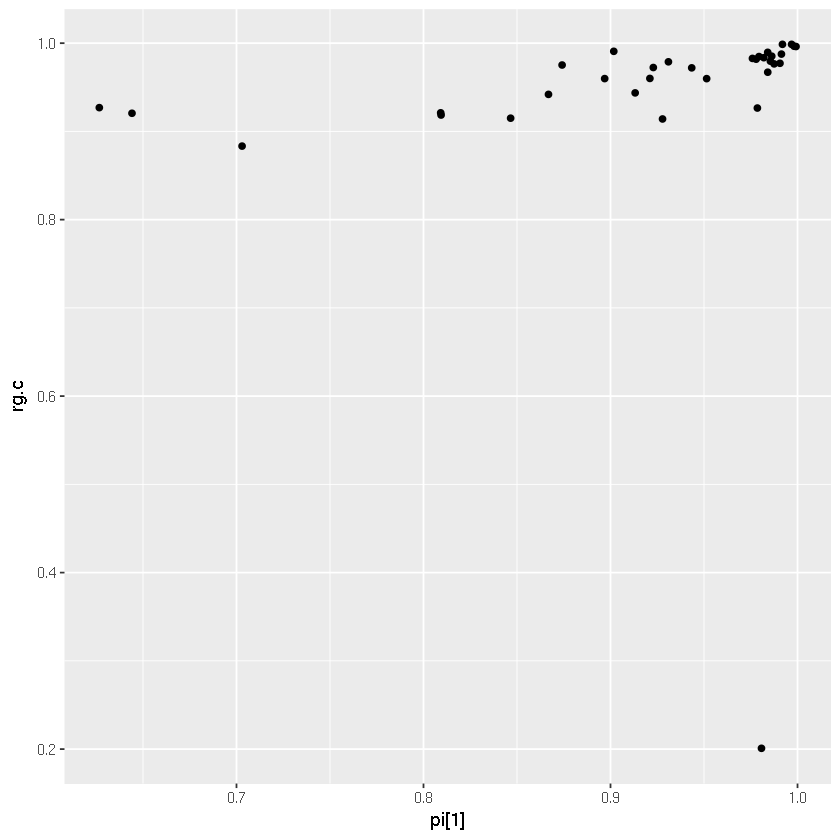

In [18]:
ggplot(m1_filt, aes(x=`pi[1]`, y=`rg.c`))+geom_point()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


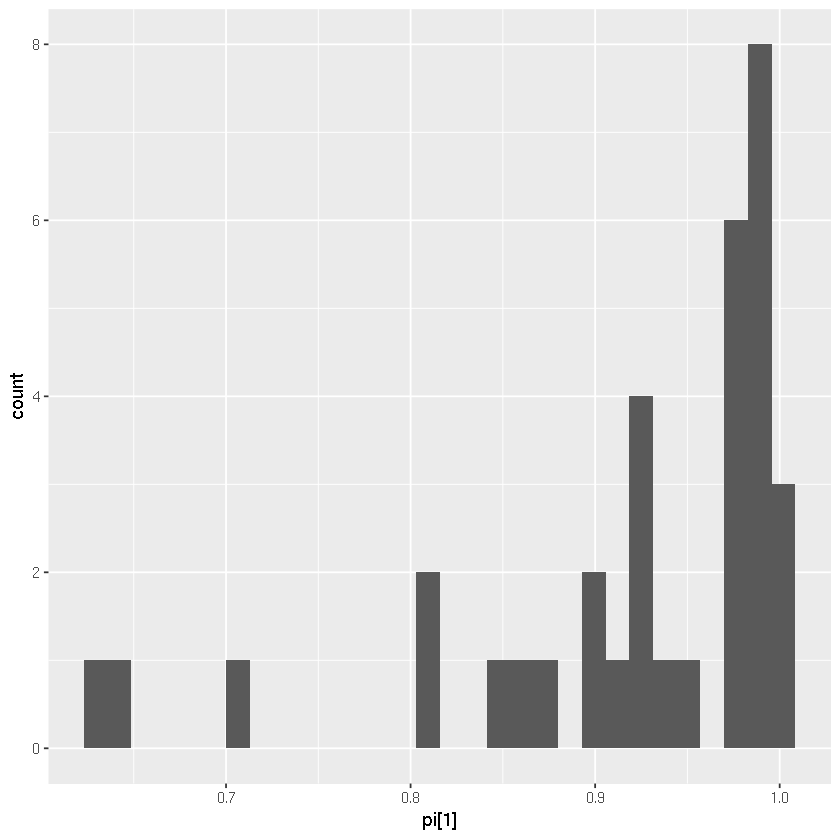

In [19]:
ggplot(m1_filt, aes(x=`pi[1]`))+geom_histogram()

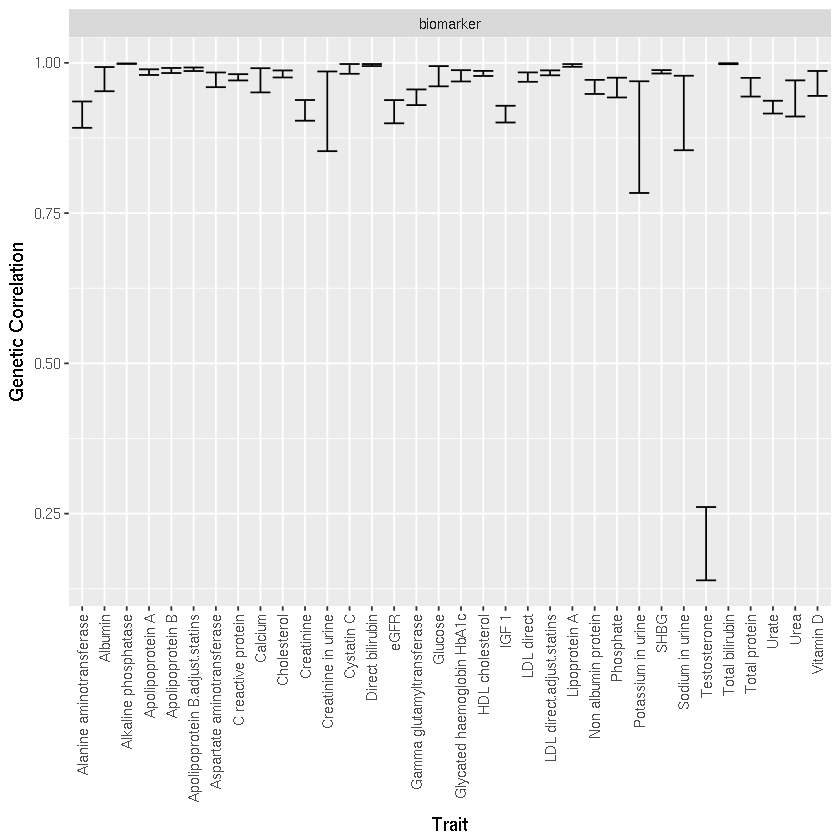

In [20]:
# plot the pis
# plot the genetic correlations

m1_filt <- m1_filt %>% mutate(variable_name=str_replace_all(variable_name, "_", " "))
ggplot(m1_filt, aes(x=variable_name, y=rg.c))+geom_errorbar(aes(ymin=rg.l, ymax=rg.u)) + 
theme(axis.text.x=element_text(angle=90,hjust=1, vjust=0.5)) +ylab("Genetic Correlation")+xlab("Trait") + 
facet_grid(. ~ category,  scales="free", space="free")

In [21]:
m1_full2 <- m1_filt %>% select(variable_name, category, c('hf.c','hm.c', 'hf.l', 'hf.u' ,'hm.l' ,'hm.u')) %>% 
gather(key="h_type", value="val", -variable_name, -category) 
m1_full2$sex <-sapply(m1_full2$h_type, function(x) strsplit(as.character(x), ".", fixed=TRUE)[[1]][[1]])
m1_full2$int <- sapply(m1_full2$h_type, function(x) strsplit(as.character(x), ".", fixed=TRUE)[[1]][[2]])
m1_full3 <- m1_full2 %>% select(-h_type) %>% unique() %>% filter(!is.na(val)) %>% mutate(val=as.numeric(val)) 


In [22]:

m1_full4 <- dcast(m1_full3, variable_name + category + sex ~ int, value.var="val", fun.aggregate = min, na.rm = TRUE)

Warning message in .fun(.value[0], ...):
“no non-missing arguments to min; returning Inf”

In [23]:
herit_df <- m1_full4 %>% rename(mid=c, low=l, up=u)  %>% 
mutate(sex=ifelse(sex=="hf", "female", ifelse(sex=="hm", "male", NA))) %>%
mutate(variable_name=str_replace_all(variable_name, "_", " "))

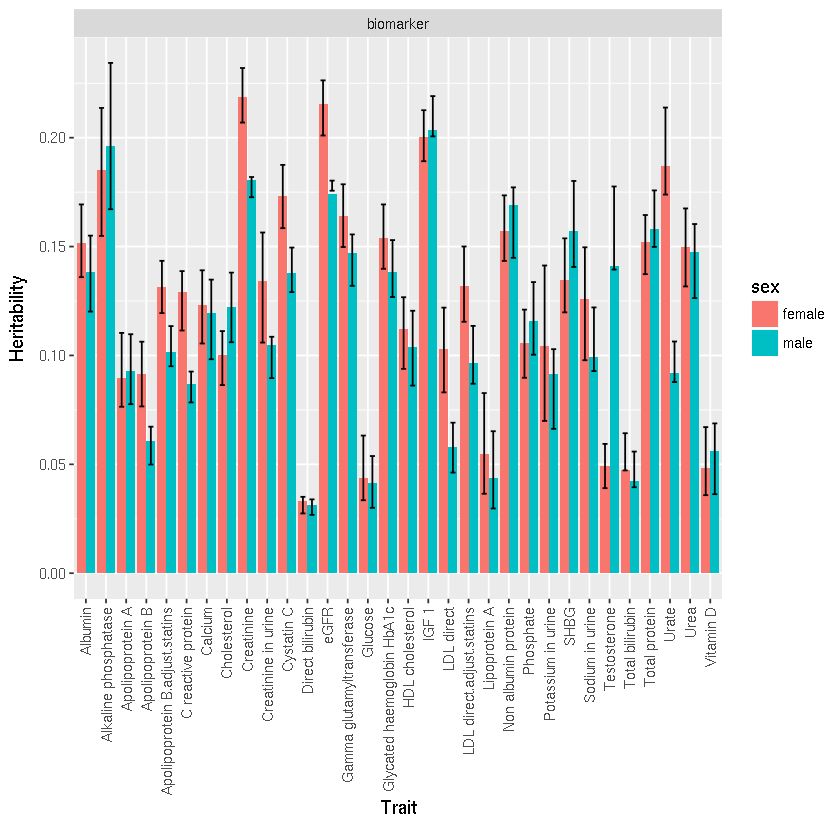

In [24]:
ggplot(filter(herit_df, category=="biomarker"), aes(x=variable_name, y=mid, fill=sex))+
geom_bar(stat="identity", position=position_dodge())+
geom_errorbar(aes(ymin=low, ymax=up), position=position_dodge(0.9), color="black", width=0.5) + 
theme(axis.text.x=element_text(angle=90,hjust=1, vjust=0.5),
     axis.title.x = element_text(margin = margin(t = 0, r = 0, b = 10, l = 0))) +ylab("Heritability")+xlab("Trait") + 
facet_grid(. ~ category,  scales="free", space="free")

In [31]:
# Alanine aminotransferase
BIOMARKER.DIR <- "../../data/1015/m1/"
m1_full %>% filter(str_detect(variable_name, "aminotransferase"))


trait,category,variable_name,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg.c,rg.l,rg.u,hf.c,hf.l,hf.u,hm.c,hm.l,hm.u
30620,biomarker,Alanine_aminotransferase,185830,0.9278233,0.07217668,7.171212e-05,6.934385e-05,6.934385e-05,8.026258e-05,0.9140675,0.8918961,0.9357448,NA,NA,NA,NA,NA,NA
30650,biomarker,Aspartate_aminotransferase,185808,0.9434305,0.05656945,1.297883e-04,1.244600e-04,1.244600e-04,1.263416e-04,0.9720029,0.9595379,0.9840022,NA,NA,NA,NA,NA,NA


In [58]:
#load("../../data/1015/m1/f_Alanine_aminotransferase.RData")
load("../../data/1015/m1/f_Aspartate_aminotransferase.RData")

Inference for Stan model: model1_no_loglik.
4 chains, each with iter=600; warmup=200; thin=1; 
post-warmup draws per chain=400, total post-warmup draws=1600.

                 mean se_mean      sd    2.5%     50%   97.5% n_eff    Rhat
Omegacor[1,1] 1.00000 0.00000 0.00000 1.00000 1.00000 1.00000  1600     NaN
Omegacor[1,2] 0.97200 0.00021 0.00634 0.95954 0.97198 0.98400   888 1.00435
Omegacor[2,1] 0.97200 0.00021 0.00634 0.95954 0.97198 0.98400   888 1.00435
Omegacor[2,2] 1.00000 0.00000 0.00000 1.00000 1.00000 1.00000  1600     NaN
pi[1]         0.94343 0.00008 0.00227 0.93875 0.94345 0.94770   740 1.00444
pi[2]         0.05657 0.00008 0.00227 0.05230 0.05655 0.06125   740 1.00444

Samples were drawn using NUTS(diag_e) at Tue Oct 15 21:02:56 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


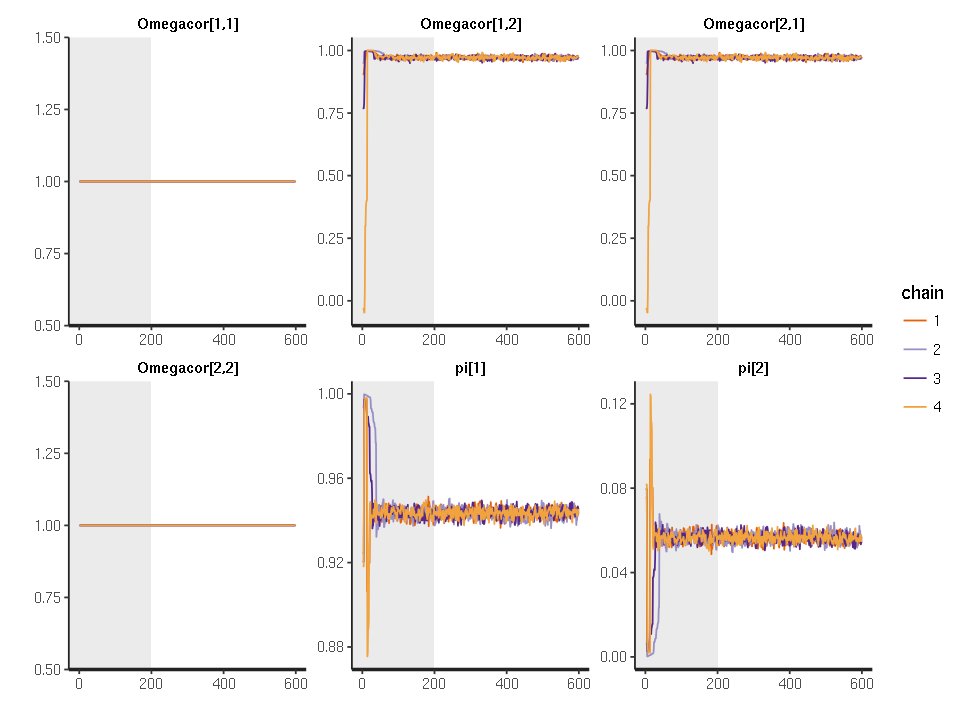

In [59]:
require('rstan')
print(fit1, pars=c("Omegacor", "pi"), probs=c(0.025, 0.5, 0.975), digits_summary=5)
options(repr.plot.width=8, repr.plot.height=6)
traceplot(fit1, pars = c("Omegacor", "pi"), inc_warmup = TRUE, nrow = 2)

In [61]:
source("../../mixture_model_scripts/model_utils.R")   

source("../../mixture_model_scripts/heritability_utils.R")  
load("../../data/1015/dat_Aspartate_aminotransferase.RData")

ndim <- 2
m1.pi <- getPi(fit1)
    m1.Sigma <- getSigmaMulti(fit1, ndim)
    rg <- getRgMulti(fit1, ndim)
    rg.c <- getRgConfMulti(fit1, ndim)


    # assign each SNP to a component, estimate heritability
    dat <- labelCategories(dat, m1.Sigma, m1.pi) # label the SNPs with heritability
    h <- overallHeritability(dat, m1.Sigma, m1.pi)
 

In [62]:
table(dat$categories)


     1      2 
184470   1337 

In [63]:
h

[1] NA NA

In [64]:
se.p2 <- dat$dat$SE[dat$categories==2,]
head(se.p2)

idx <- 1
    n <- nrow(se.p2)
    num_i <- n*(m1.pi[2])*m1.Sigma[idx,idx]
    num_i
    h_i <- num_i/(num_i + sum(se.p2[,idx]))
num_i
sum(se.p2[,1], na.rm=TRUE)
which(is.na(se.p2[,1]))
which(is.na(dat$dat$SE[,1]))

4.022540e-05,4.712136e-05
2.188060e-05,1.276483e-05
1.252502e-05,7.285303e-06
1.564234e-05,9.029604e-06
9.737131e-05,5.642624e-05
1.401596e-04,8.055386e-05


[1] 0.009823669

[1] 0.009823669

[1] 0.06376983

[1] 829

integer(0)

In [65]:
which(is.na(dat$posterior))

[1] 109068

In [66]:
source("../../mixture_model_scripts/heritability_utils.R")  


In [67]:
    h <- overallHeritability(dat, m1.Sigma, m1.pi)


In [68]:
h

[1] 0.1334855 0.1156676

In [69]:
pars <- data.frame("trait"=c("Aspartate_aminotransferase", "Alanine_aminotransferase"))
head(pars)
require('rslurm')

trait
Aspartate_aminotransferase
Alanine_aminotransferase


Loading required package: rslurm


In [72]:
calcErrBarsHerit <- function(trait){
    require('reshape2')
    require('tidyverse')

    DATA.FOLDER <- "/scratch/PI/mrivas/users/erflynn/sex_div_gwas/data/1015/"
    fit.file=sprintf("%s/m1/f_%s.RData", DATA.FOLDER, trait)

        load(file=fit.file)
        load(file=sprintf("%s/dat_%s.RData", DATA.FOLDER, trait))
print("Files loaded")
        # extract all estimate
        list_of_draws <- rstan::extract(fit1)
        pi.draws <- list_of_draws$pi
        p <- pi.draws
        s.draws <- list_of_draws$Sigma
        Sigma <- s.draws

        # extract lower + upper pi
        ordered.p <- p[order(p[,2]),] # ordering p by the non-null component 
        p.lower <- ordered.p[0.025*nrow(ordered.p),]
        p.upper <- ordered.p[0.975*nrow(ordered.p),]
        p.center <- ordered.p[0.50*nrow(ordered.p),]
    
        # extract lower + upper sigma
        ordered.S <- Sigma[order(Sigma[,1,1]),,]
        s.upper <- ordered.S[0.975*dim(Sigma)[1],,]
        s.lower <- ordered.S[0.025*dim(Sigma)[1],,]
        s.center <- ordered.S[0.50*dim(Sigma)[1],,]

        # recalculate SNP membership
        dat2 <- dat
        dat2$categories <- NULL
        dat.u <- labelCategories(dat2, s.upper, p.upper)
        dat.l <- labelCategories(dat2, s.lower, p.lower)
        dat.c <- labelCategories(dat2, s.center, p.center)

        h.up <- overallHeritability(dat.u, s.upper, p.upper)
        h.low <- overallHeritability(dat.l, s.lower, p.lower)
        h.center <- overallHeritability(dat.c, s.center, p.center)

        res <- list("up"=h.up, "low"=h.low, "center"=h.center)
  
        # reformat into data frame

     my.df <- cbind(t(as.data.frame(res)), trait)
        my.df2 <- data.frame(cbind(my.df, rownames(my.df)))

    colnames(my.df2) <- c("hf", "hm", "trait", "int")
    my.df3 <- melt(my.df2, id.vars=c("trait", "int"), variable.name="sex")
         rownames(my.df3) <- NULL
    downsampled_str <- ""
    print(my.df3)
    write.table(my.df3, file=sprintf("%s/m1/h_err_%s_%s_%s.txt", DATA.FOLDER, trait, ndim, downsampled_str), row.names=FALSE, quote=FALSE, sep="\t")
    return(my.df3)
    }
res <- calcErrBarsHerit("Alanine_aminotransferase")

[1] "Files loaded"


Warning message:
“attributes are not identical across measure variables; they will be dropped”

                     trait    int sex             value
1 Alanine_aminotransferase     up  hf 0.129366514913434
2 Alanine_aminotransferase    low  hf  0.12622008640476
3 Alanine_aminotransferase center  hf 0.144409589276355
4 Alanine_aminotransferase     up  hm 0.123616350156913
5 Alanine_aminotransferase    low  hm 0.125379633407472
6 Alanine_aminotransferase center  hm 0.137972457297647


In [73]:
res2 <- calcErrBarsHerit("Aspartate_aminotransferase")

[1] "Files loaded"


Warning message:
“attributes are not identical across measure variables; they will be dropped”

                       trait    int sex             value
1 Aspartate_aminotransferase     up  hf 0.149264206164536
2 Aspartate_aminotransferase    low  hf 0.117999292533685
3 Aspartate_aminotransferase center  hf 0.133118993031127
4 Aspartate_aminotransferase     up  hm 0.126572988277549
5 Aspartate_aminotransferase    low  hm 0.109063171631933
6 Aspartate_aminotransferase center  hm 0.117120216302207


In [3]:

require('rstan')
trait <- "eGFR"
DATA.FOLDER <- "/scratch/PI/mrivas/users/erflynn/sex_div_gwas/data/1015/"
    fit.file=sprintf("%s/m1/f_%s.RData", DATA.FOLDER, trait)

        load(file=fit.file)
        load(file=sprintf("%s/dat_%s.RData", DATA.FOLDER, trait))
print("Files loaded")
        # extract all estimate
        list_of_draws <- rstan::extract(fit1)
        pi.draws <- list_of_draws$pi
        p <- pi.draws
        s.draws <- list_of_draws$Sigma
        Sigma <- s.draws

        # extract lower + upper pi
head(pi.draws)
head(s.draws)


[1] "Files loaded"


0.8166088,0.1833912
0.8036599,0.1963401
0.8064788,0.1935212
0.8210677,0.1789323
0.8113427,0.1886573
0.8091067,0.1908933


[1] 4.970280e-05 4.638980e-05 4.816316e-05 5.210480e-05 4.773957e-05
[6] 4.844659e-05

function (x)  .Primitive("dim")

In [5]:
dim(s.draws)
dim(pi.draws)

[1] 1600    2    2

[1] 1600    2

In [31]:
summary(pi.draws[,2])
summary(s.draws[,1,1])
summary(s.draws[,1,2])
summary(s.draws[,2,2])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1735  0.1871  0.1906  0.1906  0.1941  0.2085 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
4.344e-05 4.716e-05 4.823e-05 4.827e-05 4.928e-05 5.408e-05 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
3.777e-05 4.115e-05 4.204e-05 4.211e-05 4.302e-05 4.707e-05 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
3.893e-05 4.255e-05 4.350e-05 4.354e-05 4.456e-05 4.988e-05 

In [10]:
dim(dat$dat$SE)

[1] 186055      2

In [15]:
require('tictoc')

Loading required package: tictoc


In [21]:
require('MASS')
require('Matrix')
require('mnormt')
require('qqman')


Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand

Loading required package: mnormt
Loading required package: qqman

For example usage please run: vignette('qqman')

Citation appreciated but not required:
Turner, S.D. qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. biorXiv DOI: 10.1101/005165 (2014).



In [98]:


getCategory <- function(B, SE, p, Sigma){
	# get the category of a SNP given the posterior
	# we assign SNPs to the non-null component if the posterior probability is >= 0.6
    zeros <- rep(0, length(SE)) #c(0,0)
    SE_mat <- diag(SE) #matrix(c(SE[1], 0, 0, SE[2]), 2, 2)
    p_1 = p[1]*dmnorm(B, zeros, SE_mat)
    p_2 = p[2]*dmnorm(B, zeros, SE_mat + Sigma)
    prob_1 = log(p_1) - log(p_1 + p_2)
    prob_2 = log(p_2) - log(p_1 + p_2)
    posterior <- exp(prob_2)
    category <- ifelse(posterior >= 0.6, 2, 1) # is poster
    return(category)   
}

labelCategories <- function(dat, Sigma, p){
	# update the dat list to contain posterior probabilities and categories

    B_dat <- dat$dat$B
    SE_dat <- dat$dat$SE
    N <- dat$dat$N

	dat$categories <- sapply(1:N, function(i) getCategory(B_dat[i,], SE_dat[i,], p, Sigma))
	
	return(dat)
}




calcHeritabilityMulti <- function(se.p2, Sigma, p, idx){
    n <- nrow(se.p2)
    num_i <- n*(p[2])*Sigma[idx,idx]
    
    h_i <- num_i/(num_i + sum(se.p2[,idx]))
    return(h_i)
}

overallHeritability <- function(dat, Sigma, p){
	# compute the overall heritability for a quantitative trait

    se.p2 <- dat$dat$SE[dat$categories==2,]

    list.h <- sapply(1:nrow(Sigma), function(idx) calcHeritabilityMulti(se.p2, Sigma, p, idx))
    return(list.h)
}

In [ ]:
overallHeritability <- function(dat, Sigma, p){
	# compute the overall heritability for a quantitative trait

    se.p2 <- dat$dat$SE[dat$categories==2,]

    list.h <- sapply(1:nrow(Sigma), function(idx) calcHeritabilityMulti(se.p2, Sigma, p, idx))
    return(list.h)
}

In [40]:
    zeros <- rep(0, length(SE)) #c(0,0)
    SE_mat <- diag(SE) #matrix(c(SE[1], 0, 0, SE[2]), 2, 2)
    p_1 = p[1]*dmnorm(B, zeros, SE_mat)
    p_2 = p[2]*dmnorm(B, zeros, SE_mat + Sigma)
    prob_1 = log(p_1) - log(p_1 + p_2)
    prob_2 = log(p_2) - log(p_1 + p_2)
    posterior <- exp(prob_2)
    category <- ifelse(posterior >= 0.6, 2, 1) # is poster

tic()
s.i<- s.draws[1,,]
p.i <- pi.draws[1,]

dat.i <- labelCategories(dat, s.i, p.i)
toc()
#h.i <- overallHeritability(dat.i, s.i, p.i)


Warning message in UseMethod("t"):
“closing unused connection 41 (<-localhost:11221)”Warning message in UseMethod("t"):
“closing unused connection 40 (<-localhost:11221)”Warning message in UseMethod("t"):
“closing unused connection 39 (<-localhost:11221)”Warning message in UseMethod("t"):
“closing unused connection 38 (<-localhost:11221)”Warning message in UseMethod("t"):
“closing unused connection 37 (<-localhost:11221)”Warning message in UseMethod("t"):
“closing unused connection 36 (<-localhost:11221)”Warning message in UseMethod("t"):
“closing unused connection 35 (<-localhost:11221)”Warning message in UseMethod("t"):
“closing unused connection 34 (<-localhost:11221)”Warning message in UseMethod("t"):
“closing unused connection 33 (<-localhost:11221)”Warning message in UseMethod("t"):
“closing unused connection 32 (<-localhost:11221)”Warning message in UseMethod("t"):
“closing unused connection 31 (<-localhost:11221)”Warning message in UseMethod("t"):
“closing unused connection 30 

38.047 sec elapsed


In [35]:
library(parallel)




getCategory2 <- function(i){
	# get the category of a SNP given the posterior
	# we assign SNPs to the non-null component if the posterior probability is >= 0.6

    B <- B_dat[i,]
    SE <- SE_dat[i,]
    zeros <- rep(0, length(SE)) #c(0,0)
    SE_mat <- diag(SE) #matrix(c(SE[1], 0, 0, SE[2]), 2, 2)
    p_1 = p[1]*dmnorm(B, zeros, SE_mat)
    p_2 = p[2]*dmnorm(B, zeros, SE_mat + Sigma)
    prob_1 = log(p_1) - log(p_1 + p_2)
    prob_2 = log(p_2) - log(p_1 + p_2)
    posterior <- exp(prob_2)
    category <- ifelse(posterior >= 0.6, 2, 1) # is poster
    return(category)   
}


labelCategories <- function(dat){
	# update the dat list to contain posterior probabilities and categories


    cl <- makeCluster(detectCores()-1)
	category <- parLapply(cl, 1:N, getCategory2)
    stopCluster(cl)
	dat$categories <- categories	
	return(dat)
}

In [38]:
tic()
s.i<- s.draws[1,,]
p.i <- pi.draws[1,]

    B_dat <- dat$dat$B
    SE_dat <- dat$dat$SE
    N <- dat$dat$N
    Sigma <- s.i
p <- p.i

dat.i <- labelCategories(dat)

h.i <- overallHeritability(dat.i, s.i, p.i)
toc()

ERROR: Error in checkForRemoteErrors(val): 19 nodes produced errors; first error: object 'B_dat' not found


In [ ]:
library(boot)
run1 <- function(...) {
   library(boot)
   cd4.rg <- function(data, mle) MASS::mvrnorm(nrow(data), mle$m, mle$v)
   cd4.mle <- list(m = colMeans(cd4), v = var(cd4))
   boot(cd4, corr, R = 500, sim = "parametric",
        ran.gen = cd4.rg, mle = cd4.mle)
}
cl <- makeCluster(mc <- getOption("cl.cores", 2))
## to make this reproducible
clusterSetRNGStream(cl, 123)
cd4.boot <- do.call(c, parLapply(cl, seq_len(mc), run1))
boot.ci(cd4.boot,  type = c("norm", "basic", "perc"),
        conf = 0.9, h = atanh, hinv = tanh)
stopCluster(cl)

In [90]:
 

getCategory3 <- function(i){
    B <- dat$dat$B[i,]
    SE <- dat$dat$SE[i,]
    zeros <- rep(0, length(SE)) #c(0,0)
    SE_mat <- diag(SE) #matrix(c(SE[1], 0, 0, SE[2]), 2, 2)
    p_1 = p[1]*dmnorm(B, zeros, SE_mat)
    p_2 = p[2]*dmnorm(B, zeros, SE_mat + Sigma)
    prob_1 = log(p_1) - log(p_1 + p_2)
    prob_2 = log(p_2) - log(p_1 + p_2)
    posterior <- exp(prob_2)
    category <- ifelse(posterior >= 0.6, 2, 1) # is poster
    return(category) 
}


getCategory4 <- function(l){
    return(lapply(l, getCategory3))
}

getCategory4(c(10, 20))




[[1]]
[1] 1

[[2]]
[1] 1

In [88]:
dmnorm

function (x, mean = rep(0, d), varcov, log = FALSE) 
{
    d <- if (is.matrix(varcov)) 
        ncol(varcov)
    else 1
    if (d == 1) 
        return(dnorm(x, mean, sqrt(varcov), log = log))
    x <- if (is.vector(x)) 
        t(matrix(x))
    else data.matrix(x)
    if (ncol(x) != d) 
        stop("mismatch of dimensions of 'x' and 'varcov'")
    if (is.matrix(mean)) {
        if ((nrow(x) != nrow(mean)) || (ncol(mean) != d)) 
            stop("mismatch of dimensions of 'x' and 'mean'")
    }
    if (is.vector(mean)) 
        mean <- outer(rep(1, nrow(x)), as.vector(matrix(mean, 
            d)))
    X <- t(x - mean)
    conc <- pd.solve(varcov, log.det = TRUE)
    Q <- colSums((conc %*% X) * X)
    log.det <- attr(conc, "log.det")
    logPDF <- as.vector(Q + d * logb(2 * pi) + log.det)/(-2)
    if (log) 
        logPDF
    else exp(logPDF)
}
<bytecode: 0xc92a998>
<environment: namespace:mnormt>

In [ ]:
tic()
cl <- makeCluster( detectCores())
clusterExport(cl, "dat")
clusterExport(cl, "Sigma")
clusterExport(cl, "p")
cl.out <- clusterApply(cl, list.lists, getCategory4)

stopCluster(cl)
toc()

In [57]:
detectCores()-1

[1] 19

In [84]:
list.n <- (1:dat$dat$N)
N <- dat$dat$N
ncores <- 10


In [97]:

tic()
ncores <- 10
num_per_chunk <- floor(N/ncores)
list.lists <- lapply(1:ncores, function(i) 
    {res <- ifelse(i!=ncores, 
                   return(c(((i-1)*(num_per_chunk)+1):(i*num_per_chunk))),
                   return(c(((i-1)*(num_per_chunk)+1):N))); return(res) })
cl <- makeCluster( ncores)
clusterExport(cl, "dat")
clusterExport(cl, "Sigma")
clusterExport(cl, "p")
clusterExport(cl, "getCategory3")
clusterExport(cl, "dmnorm")
cl.out <- clusterApply(cl, list.lists, getCategory4)

stopCluster(cl)
toc()


45.112 sec elapsed


In [102]:
calcOverall <- function(i){
    s.i <- s.draws[1,,]
    p.i <- pi.draws[1,]

    B_dat <- dat$dat$B
    SE_dat <- dat$dat$SE
    N <- dat$dat$N
    Sigma <- s.i
    p <- p.i

	dat.i <- sapply(1:N, function(i) getCategory(B_dat[i,], SE_dat[i,], p, Sigma))
    se.p2 <- dat.i$dat$SE[dat.i$categories==2,]

    list.h <- sapply(1:nrow(Sigma), function(idx) calcHeritabilityMulti(se.p2, Sigma, p, idx))
    return(list.h)
}

tic()
cl <- makeCluster(ncores)

clusterExport(cl, "s.draws")
clusterExport(cl, "pi.draws")
clusterExport(cl, "dat")
clusterExport(cl, "calcHeritabilityMulti")
clusterExport(cl, "getCategory")
clusterExport(cl, "dmnorm")
cl.out <- clusterApply(cl, 1:ncores, calcOverall)
stopCluster(cl)
toc()


In [ ]:
dmvn(X, mu, sigma, log = FALSE, ncores = 1, isChol = FALSE)
Arguments
X matrix n by d where each row is a d dimensional random vector. Alternatively X
can be a d-dimensional vector.
mu vector of length d, representing the mean of the distribution.
sigma covariance matrix (d x d). Alternatively it can be the cholesky decomposition of
the covariance. In that case isChol should be set to TRUE.
log boolean set to true the logarithm of the pdf is required.
ncores Number of cores used. The parallelization will take place only if OpenMP is
supported.
isChol boolean set to true is sigma is the cholesky decomposition of the covariance
matrix.
    
    
 B <- dat$dat$B[i,]
    SE <- dat$dat$SE[i,]
    zeros <- rep(0, length(SE)) #c(0,0)
    SE_mat <- diag(SE) #matrix(c(SE[1], 0, 0, SE[2]), 2, 2)
    p_1 = p[1]*dmvn(B_dat, zeros, SE_mat)
    p_2 = p[2]*dmvn(B_dat, zeros, SE_mat + Sigma)
    prob_1 = log(p_1) - log(p_1 + p_2)
    prob_2 = log(p_2) - log(p_1 + p_2)
    posterior <- exp(prob_2)
    category <- ifelse(posterior >= 0.6, 2, 1) # is poster

In [100]:
install.packages('mvnfast')

Installing package into ‘/home/users/erflynn/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Warning message in .getClassesFromCache(Class):
“closing unused connection 37 (<-localhost:11221)”Warning message in .getClassesFromCache(Class):
“closing unused connection 36 (<-localhost:11221)”Warning message in .getClassesFromCache(Class):
“closing unused connection 35 (<-localhost:11221)”Warning message in .getClassesFromCache(Class):
“closing unused connection 34 (<-localhost:11221)”Warning message in .getClassesFromCache(Class):
“closing unused connection 33 (<-localhost:11221)”Warning message in .getClassesFromCache(Class):
“closing unused connection 32 (<-localhost:11221)”Warning message in .getClassesFromCache(Class):
“closing unused connection 31 (<-localhost:11221)”Warning message in .getClassesFromCache(Class):
“closing unused connection 30 (<-localhost:11221)”Warning message in .getClassesFromCache(Class):
“closing unused connection 29 (<-localhost:11221)”Warning mess

In [101]:
require('mvnfast')
dmvn

Loading required package: mvnfast
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘mvnfast’”

ERROR: Error in eval(expr, envir, enclos): object 'dmvn' not found


In [105]:
head(order(pi.draws[,2]))
head(order(s.draws[1,1]))

[1] 1261   27  286  156  229 1056

ERROR: Error in order(Sigma.draws[1, 1]): object 'Sigma.draws' not found


In [109]:
 pi.draws <- list_of_draws$pi
        p <- pi.draws
        s.draws <- list_of_draws$Sigma
        Sigma <- s.draws
        rg.draws <- list_of_draws$Omegacor
        rg <- rg.draws
head(order(p[,2]))
head(order(Sigma[,1,1]))
head(order(rg[,1,2]))
head(rg[order(rg[,1,2]),,])

[1] 1261   27  286  156  229 1056

[1]  598  842 1018 1587  773 1557

[1]  529 1510  415  584  313 1088

[1] 1 1 1 1 1 1

In [110]:
head(rg[,1,2], 500)

[1] 0.9319963 0.9115722 0.9213435 0.9218638 0.9140915 0.9158584 0.9209004
  [8] 0.9185514 0.9071897 0.9273502 0.9130151 0.9206479 0.9173748 0.9055615
 [15] 0.9158623 0.9187327 0.9298131 0.9123190 0.9182871 0.9062115 0.9135728
 [22] 0.9142248 0.9185274 0.9030289 0.9244889 0.9024700 0.9128482 0.9308465
 [29] 0.9258847 0.9116179 0.9223346 0.9205633 0.9188139 0.9050346 0.9134120
 [36] 0.9067817 0.9313305 0.9272566 0.9324321 0.9191125 0.9122972 0.9022958
 [43] 0.9142699 0.9145803 0.9353685 0.9077186 0.9334207 0.9217645 0.9114512
 [50] 0.9157033 0.9061027 0.9302803 0.9166302 0.9121939 0.9163152 0.9123744
 [57] 0.9229217 0.9245547 0.9210545 0.9191920 0.9215371 0.9231049 0.9083410
 [64] 0.9035563 0.9143153 0.9131660 0.9253696 0.9114997 0.9257824 0.9315229
 [71] 0.9243865 0.9242731 0.9215788 0.9201841 0.9298578 0.9132080 0.9152256
 [78] 0.9061172 0.9176968 0.9114897 0.9066994 0.9095221 0.9226753 0.9170802
 [85] 0.9178723 0.9034129 0.9152142 0.9232816 0.9266097 0.9163302 0.9158081
 [92] 0.9146006 0.9222564 0.9011013 0.9384411 0.9215489 0.9223788 0.9161019
 [99] 0.9184378 0.8914505 0.9330968 0.9061332 0.9250592 0.9248386 0.9172971
[106] 0.9301608 0.9119268 0.9069192 0.9152154 0.9247797 0.9186089 0.9356387
[113] 0.9235497 0.9281249 0.9295385 0.9156940 0.8962927 0.9258994 0.9026880
[120] 0.9211005 0.9094672 0.9230482 0.9115866 0.9071714 0.9111979 0.9287422
[127] 0.9470584 0.9231680 0.9107562 0.9364051 0.9220394 0.9287126 0.9182155
[134] 0.9054863 0.9213414 0.9136550 0.9236061 0.9114043 0.9354482 0.9076744
[141] 0.9374413 0.9188864 0.9171606 0.9200725 0.9151543 0.9228931 0.9169131
[148] 0.9131552 0.9244245 0.9258610 0.9372698 0.9186924 0.9303844 0.9089415
[155] 0.9167667 0.9107345 0.9170737 0.9355662 0.9187711 0.9251199 0.9182789
[162] 0.9088631 0.9349482 0.9130951 0.9266877 0.9280751 0.9148396 0.9362703
[169] 0.9341024 0.9169261 0.9066319 0.9026786 0.9140621 0.9221148 0.9210540
[176] 0.9280098 0.9306900 0.9305737 0.9226333 0.9216016 0.9082132 0.9056589
[183] 0.9281920 0.9395861 0.9204150 0.9180433 0.9101415 0.9264594 0.9024574
[190] 0.9115285 0.9202138 0.9140562 0.9289756 0.9171648 0.9280125 0.9245960
[197] 0.9316973 0.9189341 0.9114545 0.9247019 0.9094508 0.9176539 0.9180680
[204] 0.9353621 0.9120568 0.9178065 0.9250642 0.9160216 0.9259491 0.9152505
[211] 0.9219233 0.9190018 0.9249126 0.9211668 0.9215159 0.9183109 0.9291963
[218] 0.9293150 0.9033470 0.9359346 0.9040055 0.9269948 0.9157652 0.8989294
[225] 0.9179443 0.9123074 0.9293780 0.9049126 0.9147665 0.9268516 0.9309619
[232] 0.9073965 0.9093289 0.9290587 0.9083532 0.9156461 0.9115038 0.9077604
[239] 0.9230144 0.9015166 0.9443956 0.9321171 0.9170421 0.9270932 0.9090328
[246] 0.9123336 0.8985692 0.9230483 0.8945157 0.9142652 0.9269204 0.9295906
[253] 0.9292102 0.9158047 0.9211894 0.9383012 0.9011553 0.9179844 0.9217075
[260] 0.9217086 0.9082483 0.9130361 0.9251196 0.9284086 0.9123296 0.9174059
[267] 0.9061988 0.9167856 0.9361803 0.9143017 0.9261397 0.9376795 0.9300508
[274] 0.9149477 0.9219839 0.9015832 0.8947286 0.9151977 0.9303422 0.9381356
[281] 0.9285918 0.9132961 0.9225961 0.9156115 0.9206181 0.9156743 0.9196101
[288] 0.9464955 0.9052602 0.9242320 0.9187864 0.9127592 0.9242113 0.9105331
[295] 0.9060139 0.9178607 0.9177365 0.9168678 0.9160195 0.9271362 0.9131986
[302] 0.9237744 0.9050402 0.9054426 0.9305081 0.9291752 0.8982856 0.9193250
[309] 0.9148075 0.9017735 0.9270793 0.9149845 0.8904908 0.9125558 0.9193904
[316] 0.9208319 0.9111221 0.9223747 0.9199255 0.9139958 0.9270599 0.9028681
[323] 0.9153374 0.9181656 0.9267646 0.9073450 0.9306734 0.9135678 0.9204456
[330] 0.9198425 0.9265438 0.9192187 0.9229383 0.9341024 0.9258505 0.9102182
[337] 0.9212262 0.9225171 0.9242363 0.9138756 0.9292137 0.9164410 0.9364908
[344] 0.9166660 0.9176098 0.9172629 0.9241924 0.9312107 0.9095974 0.8998669
[351] 0.9278859 0.9318797 0.9217113 0.9093447 0.9228171 0.9189424 0.9313840
[358] 0.9191492 0.9333373 0.9130415 0.9219044 0.9208008 0.9069189 0.9187521
[365] 0.9156358 0.9187161 0.9219153 0.9212260 0.91

In [115]:
 DATA.FOLDER <- "/scratch/PI/mrivas/users/erflynn/sex_div_gwas/data/1015/"
    fit.file=sprintf("%s/m1/f_%s.RData", DATA.FOLDER, trait)

        load(file=fit.file)
        load(file=sprintf("%s/dat_%s.RData", DATA.FOLDER, trait))
print("Files loaded")
trait <- "eGFR"
list_of_draws <- rstan::extract(fit1)
        pi.draws <- list_of_draws$pi
        p <- pi.draws
        s.draws <- list_of_draws$Sigma
        Sigma <- s.draws

        # extract lower + upper pi
        rg.draws <- list_of_draws$Omegacor
        rg <- rg.draws
        my.order <- order(p[,2])
        ordered.p <- p[my.order,] # ordering p by the non-null component 
        p.lower <- ordered.p[0.025*nrow(ordered.p),]
        p.upper <- ordered.p[0.975*nrow(ordered.p),]
        p.center <- ordered.p[0.50*nrow(ordered.p),]
    
        # extract lower + upper sigma
        ordered.S <- Sigma[my.order,,]
        s.upper <- ordered.S[0.975*dim(Sigma)[1],,]
        s.lower <- ordered.S[0.025*dim(Sigma)[1],,]
        s.center <- ordered.S[0.50*dim(Sigma)[1],,]

        # recalculate SNP membership
        dat2 <- dat
        dat2$categories <- NULL
        dat.u <- labelCategories(dat2, s.upper, p.upper)
        dat.l <- labelCategories(dat2, s.lower, p.lower)
        dat.c <- labelCategories(dat2, s.center, p.center)

        h.up <- overallHeritability(dat.u, s.upper, p.upper)
        h.low <- overallHeritability(dat.l, s.lower, p.lower)
        h.center <- overallHeritability(dat.c, s.center, p.center)
    res <- list("up"=h.up, "low"=h.low, "center"=h.center)
  
        # reformat into data frame

     my.df <- cbind(t(as.data.frame(res)), trait)
        my.df2 <- data.frame(cbind(my.df, rownames(my.df)))

    colnames(my.df2) <- c("hf", "hm", "trait", "int")
    my.df3 <- melt(my.df2, id.vars=c("trait", "int"), variable.name="sex")
         rownames(my.df3) <- NULL
    downsampled_str <- ""
    print(my.df3)

[1] "Files loaded"


Warning message:
“attributes are not identical across measure variables; they will be dropped”

  trait    int sex              value
1  eGFR     up  hf 0.0507160993360999
2  eGFR    low  hf 0.0474710913073281
3  eGFR center  hf 0.0478651004601731
4  eGFR     up  hm  0.154618331807347
5  eGFR    low  hm  0.137938199516606
6  eGFR center  hm   0.14408293334523


In [24]:
BIOMARKER.DIR <- "../../data/1015/"
biomarker_traits <- list.files(BIOMARKER.DIR, pattern="dat*")

biomarkers <- sapply(biomarker_traits, function(x) strsplit(strsplit(x, "dat_",fixed=TRUE)[[1]][[2]], ".RData")[[1]][[1]])


length(biomarkers)
pars <- data.frame("trait"=biomarkers)
pars
    

[1] 40

,trait
dat_Alanine_aminotransferase.RData,Alanine_aminotransferase
dat_Albumin.RData,Albumin
dat_Alkaline_phosphatase.RData,Alkaline_phosphatase
dat_Apolipoprotein_A.RData,Apolipoprotein_A
dat_Apolipoprotein_B.adjust.statins.RData,Apolipoprotein_B.adjust.statins
dat_Apolipoprotein_B.RData,Apolipoprotein_B
dat_Aspartate_aminotransferase.RData,Aspartate_aminotransferase
dat_C_reactive_protein.RData,C_reactive_protein
dat_Calcium.RData,Calcium
dat_Cholesterol.adjust.statins.RData,Cholesterol.adjust.statins


In [42]:
require('rslurm')
calcErrBarsHerit <- function(trait){
require('rstan')
    source("/scratch/PI/mrivas/users/erflynn/sex_div_gwas/mixture_model_scripts/model_utils.R")
    source("/scratch/PI/mrivas/users/erflynn/sex_div_gwas/mixture_model_scripts/heritability_utils.R")
    require('reshape2')
    require('tidyverse')
    ndim <- 2
    downsampled_str <- ""
    
    DATA.FOLDER <- "/scratch/PI/mrivas/users/erflynn/sex_div_gwas/data/1015/"
    fit.file=sprintf("%s/m1/f_%s.RData", DATA.FOLDER, trait)
    if (!file.exists(fit.file)){
            df <- data.frame(t(c("NA", trait, "NA", "NA")))
            colnames(df) <- c("value", "trait", "int", "sex")
            return(df)

        }
        load(file=fit.file)
        load(file=sprintf("%s/dat_%s.RData", DATA.FOLDER, trait))

        # extract all estimate
        list_of_draws <- rstan::extract(fit1)
        pi.draws <- list_of_draws$pi
        p <- pi.draws
        s.draws <- list_of_draws$Sigma
        Sigma <- s.draws

        # extract lower + upper pi
        my.order <- order(p[,2])
        ordered.p <- p[my.order,] # ordering p by the non-null component         
        p.lower <- ordered.p[0.025*nrow(ordered.p),]
        p.upper <- ordered.p[0.975*nrow(ordered.p),]
        p.center <- ordered.p[0.50*nrow(ordered.p),]
    
        # extract lower + upper sigma
        ordered.S <- Sigma[my.order,,]
        s.upper <- ordered.S[0.975*dim(Sigma)[1],,]
        s.lower <- ordered.S[0.025*dim(Sigma)[1],,]
        s.center <- ordered.S[0.50*dim(Sigma)[1],,]

        # recalculate SNP membership
        dat2 <- dat
        dat2$categories <- NULL
        dat.u <- labelCategories(dat2, s.upper, p.upper)
        dat.l <- labelCategories(dat2, s.lower, p.lower)
        dat.c <- labelCategories(dat2, s.center, p.center)

        h.up <- overallHeritability(dat.u, s.upper, p.upper)
        h.low <- overallHeritability(dat.l, s.lower, p.lower)
        h.center <- overallHeritability(dat.c, s.center, p.center)

        res <- list("up"=h.up, "low"=h.low, "center"=h.center)
  
        # reformat into data frame

     my.df <- cbind(t(as.data.frame(res)), trait)
        my.df2 <- data.frame(cbind(my.df, rownames(my.df)))

    colnames(my.df2) <- c("hf", "hm", "trait", "int")
    my.df3 <- melt(my.df2, id.vars=c("trait", "int"), variable.name="sex")
         rownames(my.df3) <- NULL
	write.table(my.df3, file=sprintf("/scratch/PI/mrivas/users/erflynn/sex_div_gwas/data/err_bars_1016/h_err_%s_%s_%s_v2.txt",  trait, ndim, downsampled_str), row.names=FALSE, quote=FALSE, sep="\t")
    return(my.df3)
    }



In [ ]:
require('parallel')
require('tictoc')
tic()
ncores <- detectCores()-1
ncores
pars$trait[1:ncores]
cl <- makeCluster( ncores)

cl.out <- clusterApply(cl, pars$trait[1:ncores], calcErrBarsHerit)

stopCluster(cl)
toc()

Loading required package: tictoc


[1] 19

[1] Alanine_aminotransferase        Albumin                        
 [3] Alkaline_phosphatase            Apolipoprotein_A               
 [5] Apolipoprotein_B.adjust.statins Apolipoprotein_B               
 [7] Aspartate_aminotransferase      C_reactive_protein             
 [9] Calcium                         Cholesterol.adjust.statins     
[11] Cholesterol                     Creatinine_in_urine            
[13] Creatinine                      Cystatin_C                     
[15] Direct_bilirubin                eGFR                           
[17] Fasting_glucose                 Gamma_glutamyltransferase      
[19] Glucose                        
40 Levels: Alanine_aminotransferase Albumin ... Vitamin_D

In [26]:
sopt <- c(partition="rbaltman,owners", time="1:00:00", memory="8000", error="pars_err.err")
sjob <- slurm_apply(calcErrBarsHerit, pars, nodes=10, jobname = 'err_barsA', slurm_options=sopt , submit = TRUE )


In [29]:
traits <- list.files("../../data/1016/m1/", pattern="f_*")
traits
traits2 <- sapply(traits, function(x) strsplit(strsplit(x, "f_",fixed=TRUE)[[1]][[2]], ".RData")[[1]][[1]])


length(traits2)
pars2 <- data.frame("trait"=traits2)
pars2

[1] "f_INI20150.RData" "f_INI21001.RData" "f_INI23099.RData" "f_INI23105.RData"
 [5] "f_INI3063.RData"  "f_INI3064.RData"  "f_INI4079.RData"  "f_INI4080.RData" 
 [9] "f_INI49.RData"    "f_INI50.RData"

[1] 10

,trait
f_INI20150.RData,INI20150
f_INI21001.RData,INI21001
f_INI23099.RData,INI23099
f_INI23105.RData,INI23105
f_INI3063.RData,INI3063
f_INI3064.RData,INI3064
f_INI4079.RData,INI4079
f_INI4080.RData,INI4080
f_INI49.RData,INI49
f_INI50.RData,INI50


In [23]:
calcErrBarsHerit2("INI50")


Warning message:
“attributes are not identical across measure variables; they will be dropped”

trait,int,sex,value
INI50,up,hf,0.318559332116743
INI50,low,hf,0.321239916795141
INI50,center,hf,0.319305965058208
INI50,up,hm,0.280943119972911
INI50,low,hm,0.285551146435223
INI50,center,hm,0.283156876121812


In [30]:
require('rslurm')
require('rstan')
calcErrBarsHerit2 <- function(trait){
    source("/scratch/PI/mrivas/users/erflynn/sex_div_gwas/mixture_model_scripts/model_utils.R")
    source("/scratch/PI/mrivas/users/erflynn/sex_div_gwas/mixture_model_scripts/heritability_utils.R")
    require('reshape2')
    require('tidyverse')
    ndim <- 2
    downsampled_str <- ""
    
    DATA.FOLDER <- "/scratch/PI/mrivas/users/erflynn/sex_div_gwas/data/1016/"
    fit.file=sprintf("%s/m1/f_%s.RData", DATA.FOLDER, trait)
    if (!file.exists(fit.file)){
            df <- data.frame(t(c("NA", trait, "NA", "NA")))
            colnames(df) <- c("value", "trait", "int", "sex")
            return(df)

        }
        load(file=fit.file)
        load(file=sprintf("%s/dat_%s.RData", DATA.FOLDER, trait))

        # extract all estimate
        list_of_draws <- rstan::extract(fit1)
        pi.draws <- list_of_draws$pi
        p <- pi.draws
        s.draws <- list_of_draws$Sigma
        Sigma <- s.draws

        # extract lower + upper pi
        my.order <- order(p[,2])
        ordered.p <- p[my.order,] # ordering p by the non-null component         
        p.lower <- ordered.p[0.025*nrow(ordered.p),]
        p.upper <- ordered.p[0.975*nrow(ordered.p),]
        p.center <- ordered.p[0.50*nrow(ordered.p),]
    
        # extract lower + upper sigma
        ordered.S <- Sigma[my.order,,]
        s.upper <- ordered.S[0.975*dim(Sigma)[1],,]
        s.lower <- ordered.S[0.025*dim(Sigma)[1],,]
        s.center <- ordered.S[0.50*dim(Sigma)[1],,]

        # recalculate SNP membership
        dat2 <- dat
        dat2$categories <- NULL
        dat.u <- labelCategories(dat2, s.upper, p.upper)
        dat.l <- labelCategories(dat2, s.lower, p.lower)
        dat.c <- labelCategories(dat2, s.center, p.center)

        h.up <- overallHeritability(dat.u, s.upper, p.upper)
        h.low <- overallHeritability(dat.l, s.lower, p.lower)
        h.center <- overallHeritability(dat.c, s.center, p.center)

        res <- list("up"=h.up, "low"=h.low, "center"=h.center)
  
        # reformat into data frame

     my.df <- cbind(t(as.data.frame(res)), trait)
        my.df2 <- data.frame(cbind(my.df, rownames(my.df)))

    colnames(my.df2) <- c("hf", "hm", "trait", "int")
    my.df3 <- melt(my.df2, id.vars=c("trait", "int"), variable.name="sex")
         rownames(my.df3) <- NULL
	write.table(my.df3, file=sprintf("/scratch/PI/mrivas/users/erflynn/sex_div_gwas/data/err_bars_1016/h_err_%s_%s_%s_v2.txt",trait, ndim, downsampled_str), row.names=FALSE, quote=FALSE, sep="\t")
    return(my.df3)
    }



In [40]:
sopt <- c(partition="rbaltman", time="1:00:00", memory="8000",nodes="10")
sjob2 <- slurm_apply(calcErrBarsHerit2, pars2, jobname = 'err_barsD', slurm_options=sopt , submit = TRUE )


In [36]:
res <- get_slurm_out(sjob2, outtype = 'table')
head(res, 3)

Warning message in get_slurm_out(sjob2, outtype = "table"):
“The following files are missing: results_0.RDS, results_1.RDS, results_2.RDS, results_3.RDS, results_4.RDS”

[1] NA

In [34]:
rownames(pars) <- NULL
rownames(pars2) <- NULL

In [39]:
require('rstan')
